# Title of the project 2: “Diabetes Patients”

## About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. 

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).


# Importing Modules

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

## Loading the Data

In [24]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
filepath = r'C:\Users\HP\Downloads\Data Science Internship\Project 2 - Diabetes Data-20231111T083906Z-001\Project 2 - Diabetes Data\Project 2 MeriSKILL\diabetes.csv'
df = pd.read_csv(filepath)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Data Preprocessing

In [82]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].values
X[0:3]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ,   1.   ]])

In [14]:
Y=df['Outcome']
Y[0:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [28]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (614, 9) (614,)
Test set: (154, 9) (154,)


# Linear Regression Plot

In [29]:
LinearReg=LinearRegression()
LinearReg.fit(X_train, Y_train)

LinearRegression()

In [81]:
# predictions
LR_pred = LinearReg.predict(X_test)
LR_pred[0:5]

array([-1.59118927e-16, -8.05031603e-17, -1.02136499e-16,  1.00000000e+00,
        6.52594602e-16])

In [35]:
# Accuracy Evaluations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LinearRegression_MAE = mean_absolute_error(Y_test, LR_pred)
LinearRegression_MSE = mean_squared_error(Y_test, LR_pred)
LinearRegression_R2 = r2_score(Y_test, LR_pred)

In [99]:
# Create a DataFrame
Result = {
    'Metric':['Mean Absolute Error', 'Mean Squared Error', 'R^2 Score'],
    'Linear Regression': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
        }

Report=pd.DataFrame(Result)

# Display the DataFrame
print(Report)

                Metric  Linear Regression
0  Mean Absolute Error       5.206544e-16
1   Mean Squared Error       4.855015e-31
2            R^2 Score       1.000000e+00


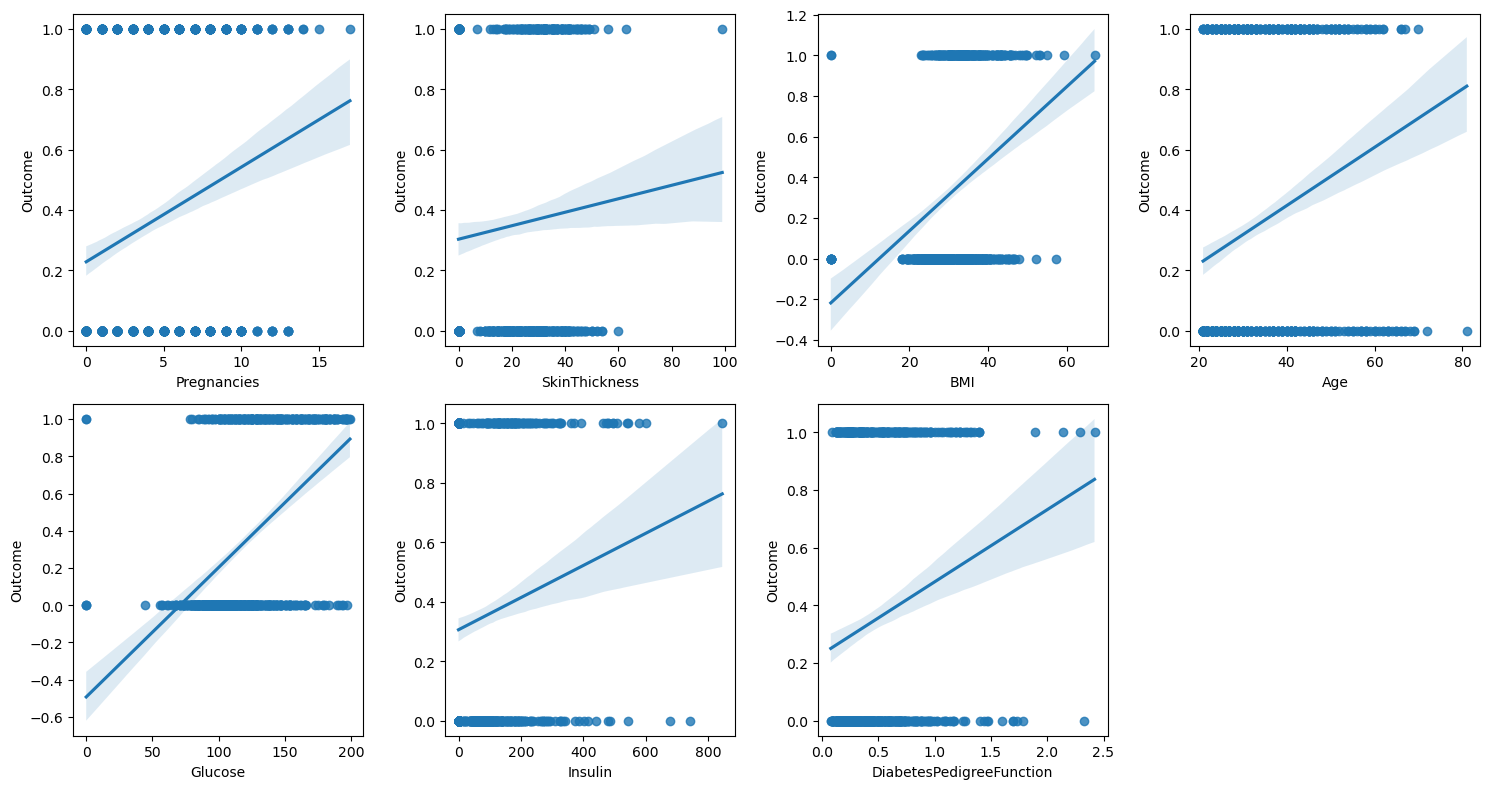

In [51]:
#### import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Set up a 2x4 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Plot the first column
sns.regplot(x='Pregnancies', y='Outcome', data=df, ax=axes[0, 0])
sns.regplot(x='Glucose', y='Outcome', data=df, ax=axes[1, 0])

# Plot the second column
sns.regplot(x='SkinThickness', y='Outcome', data=df, ax=axes[0, 1])
sns.regplot(x='Insulin', y='Outcome', data=df, ax=axes[1, 1])

# Plot the third column
sns.regplot(x='BMI', y='Outcome', data=df, ax=axes[0, 2])
sns.regplot(x='DiabetesPedigreeFunction', y='Outcome', data=df, ax=axes[1, 2])

# Plot the fourth column
sns.regplot(x='Age', y='Outcome', data=df, ax=axes[0, 3])

# Remove empty subplot
fig.delaxes(axes[1, 3])

# Adjust layout
plt.tight_layout()

# KNN Modelling

In [41]:
k = 4
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
print(KNN)

KNeighborsClassifier(n_neighbors=4)


In [43]:
Y_pred = KNN.predict(X_test)
Y_pred[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [46]:
KNN_Accuracy_Score = metrics.accuracy_score(Y_train, KNN.predict(X_train))
KNN_JaccardIndex = metrics.accuracy_score(Y_test, Y_pred)
KNN_F1_Score = f1_score(Y_test, Y_pred)

results_df = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'KNN': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})
print(results_df)

           Metric       KNN
0  Accuracy Score  0.812704
1   Jaccard Index  0.694805
2        F1 Score  0.494624


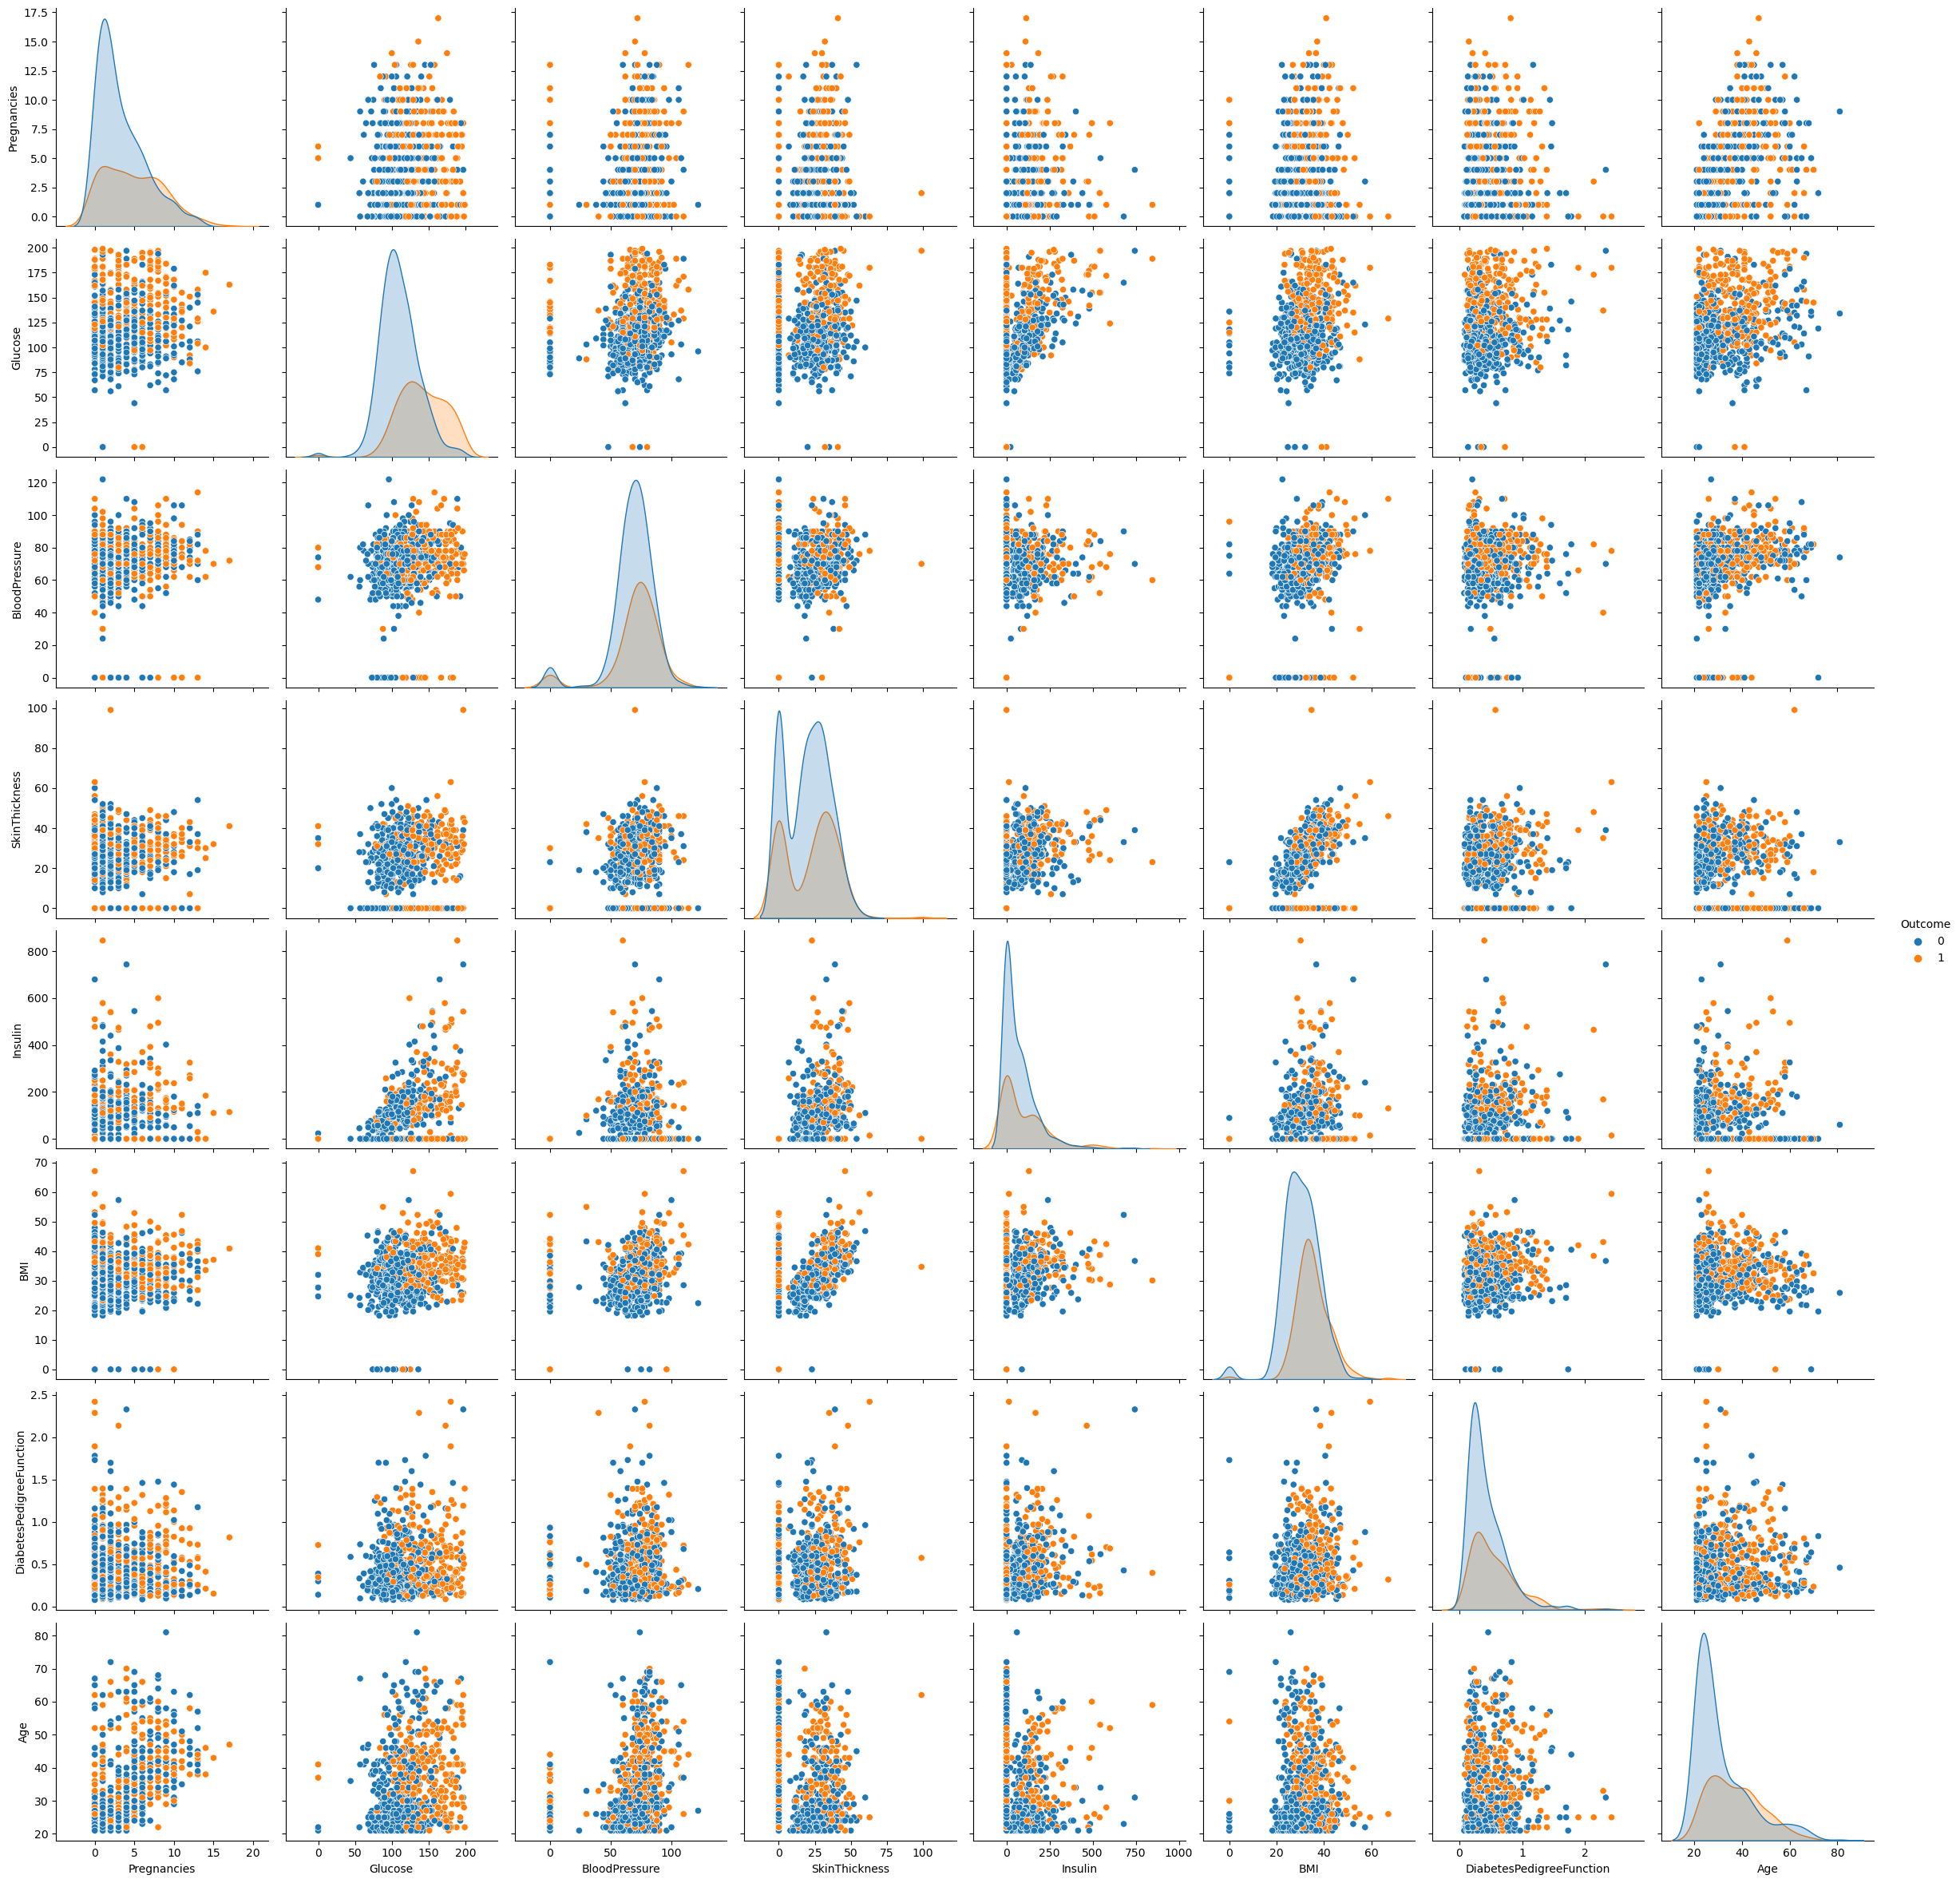

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select features
x_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Add 'Outcome' as the hue parameter
sns.pairplot(df, x_vars=x_vars, hue='Outcome', height=3)

# Display the plot
plt.show()

# Decision Tree

In [54]:
DiabetesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DiabetesTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
DiabetesTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [56]:
Y_pred = DiabetesTree.predict(X_testset)

In [57]:
print (Y_pred [0:5])
print (Y_test [0:5])

[0 0 0 1 0]
568    0
620    0
456    0
197    1
714    0
Name: Outcome, dtype: int64


In [59]:
#Evaluation
Tree_Accuracy_Score = accuracy_score(Y_test,Y_pred)
Tree_JaccardIndex = jaccard_score(Y_test, Y_pred, average='weighted')
Tree_F1_Score = f1_score(Y_test, Y_pred, average='weighted')

# Create a DataFrame
result_df = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Decision Tree': [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]
})

# Display the DataFrame
print(result_df)

           Metric  Decision Tree
0  Accuracy Score            1.0
1   Jaccard Index            1.0
2        F1 Score            1.0


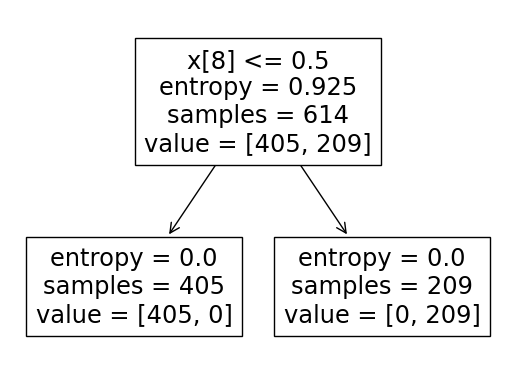

In [60]:
# Visualization
tree.plot_tree(DiabetesTree)
plt.show()

# Logistic Regression

In [61]:
X_train, Y_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [62]:
Y_pred = LR.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [63]:
predict_proba =LR.predict_proba(X_test)

print("Prediction Probabilities:")
print(predict_proba[:5])

Prediction Probabilities:
[[0.64463393 0.35536607]
 [0.82632931 0.17367069]
 [0.71597705 0.28402295]
 [0.46098964 0.53901036]
 [0.79144058 0.20855942]]


In [91]:
from sklearn.metrics import log_loss

# Assuming 'y_true' is the true labels and 'y_pred_prob' is the predicted probabilities
loss = log_loss(Y_test, predict_proba)
loss

0.7370359186664125

In [70]:
# Calculate metrics
LR_Accuracy_Score = accuracy_score(Y_test, Y_pred)
LR_JaccardIndex = jaccard_score(Y_test, Y_pred, average='weighted')
LR_F1_Score = f1_score(Y_test, Y_pred, average='weighted')

# Create a DataFrame
result_df_lr = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Logistic Regression': [LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score]
})

# Display the DataFrame
print(result_df_lr)

           Metric  Logistic Regression
0  Accuracy Score             0.584416
1   Jaccard Index             0.413082
2        F1 Score             0.561077


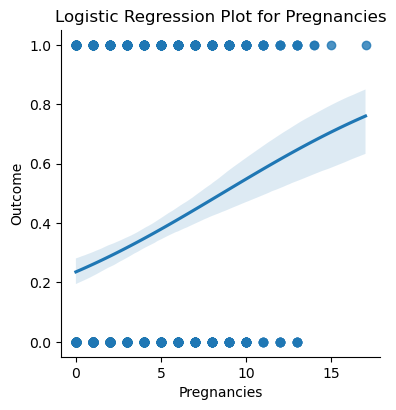

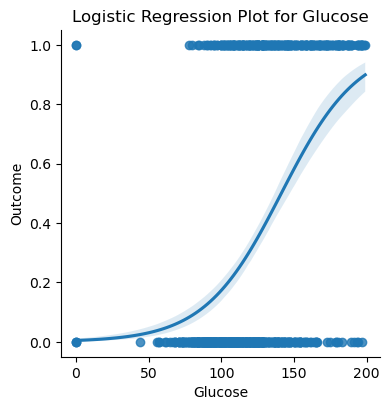

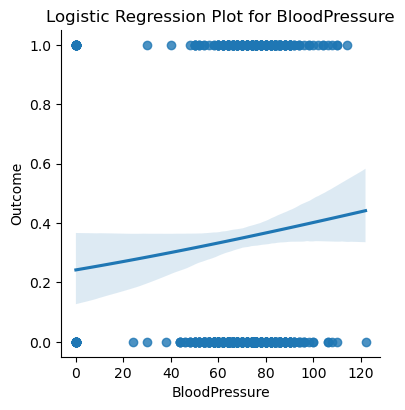

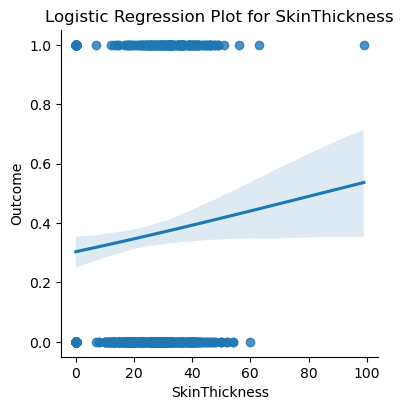

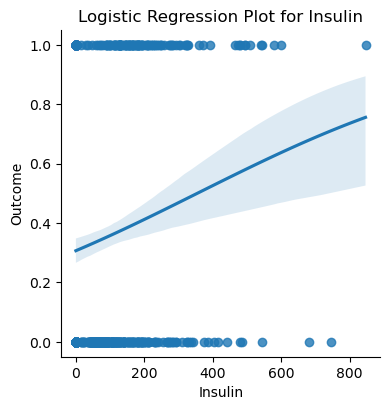

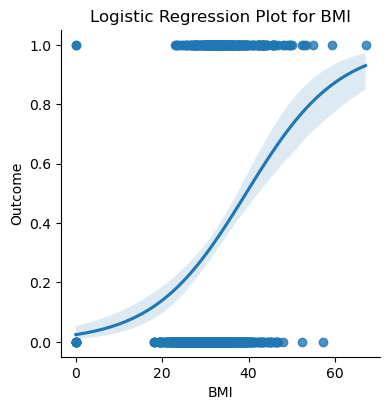

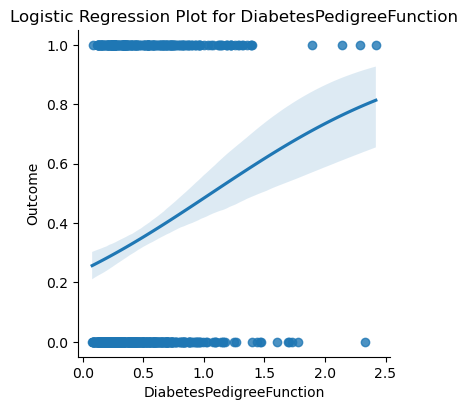

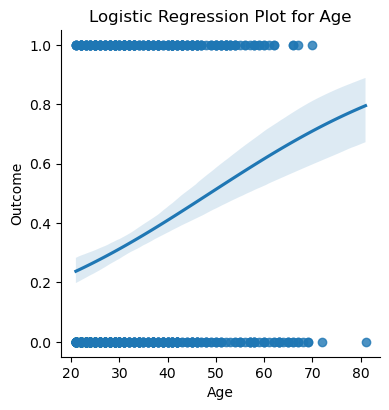

In [71]:
# Select features and target variable
x_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y_var = 'Outcome'

# Create logistic regression plots
for x in x_vars:
    sns.lmplot(x=x, y=y_var, data=df, logistic=True, height=4)
    plt.title(f'Logistic Regression Plot for {x}')
    plt.show()


# Support Vector Machine

In [72]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, Y_train) 

SVC()

In [74]:
Y_pred = SVM.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [100]:
# Calculate metrics
SVM_Accuracy_Score = accuracy_score(Y_test, Y_pred)
SVM_JaccardIndex = jaccard_score(Y_test, Y_pred, average='weighted')
SVM_F1_Score = f1_score(Y_test, Y_pred, average='weighted')

# Create a DataFrame
Report = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'SVM': [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]
})

# Display the DataFrame
print(Report)

           Metric       SVM
0  Accuracy Score  0.623377
1   Jaccard Index  0.448000
2        F1 Score  0.595130


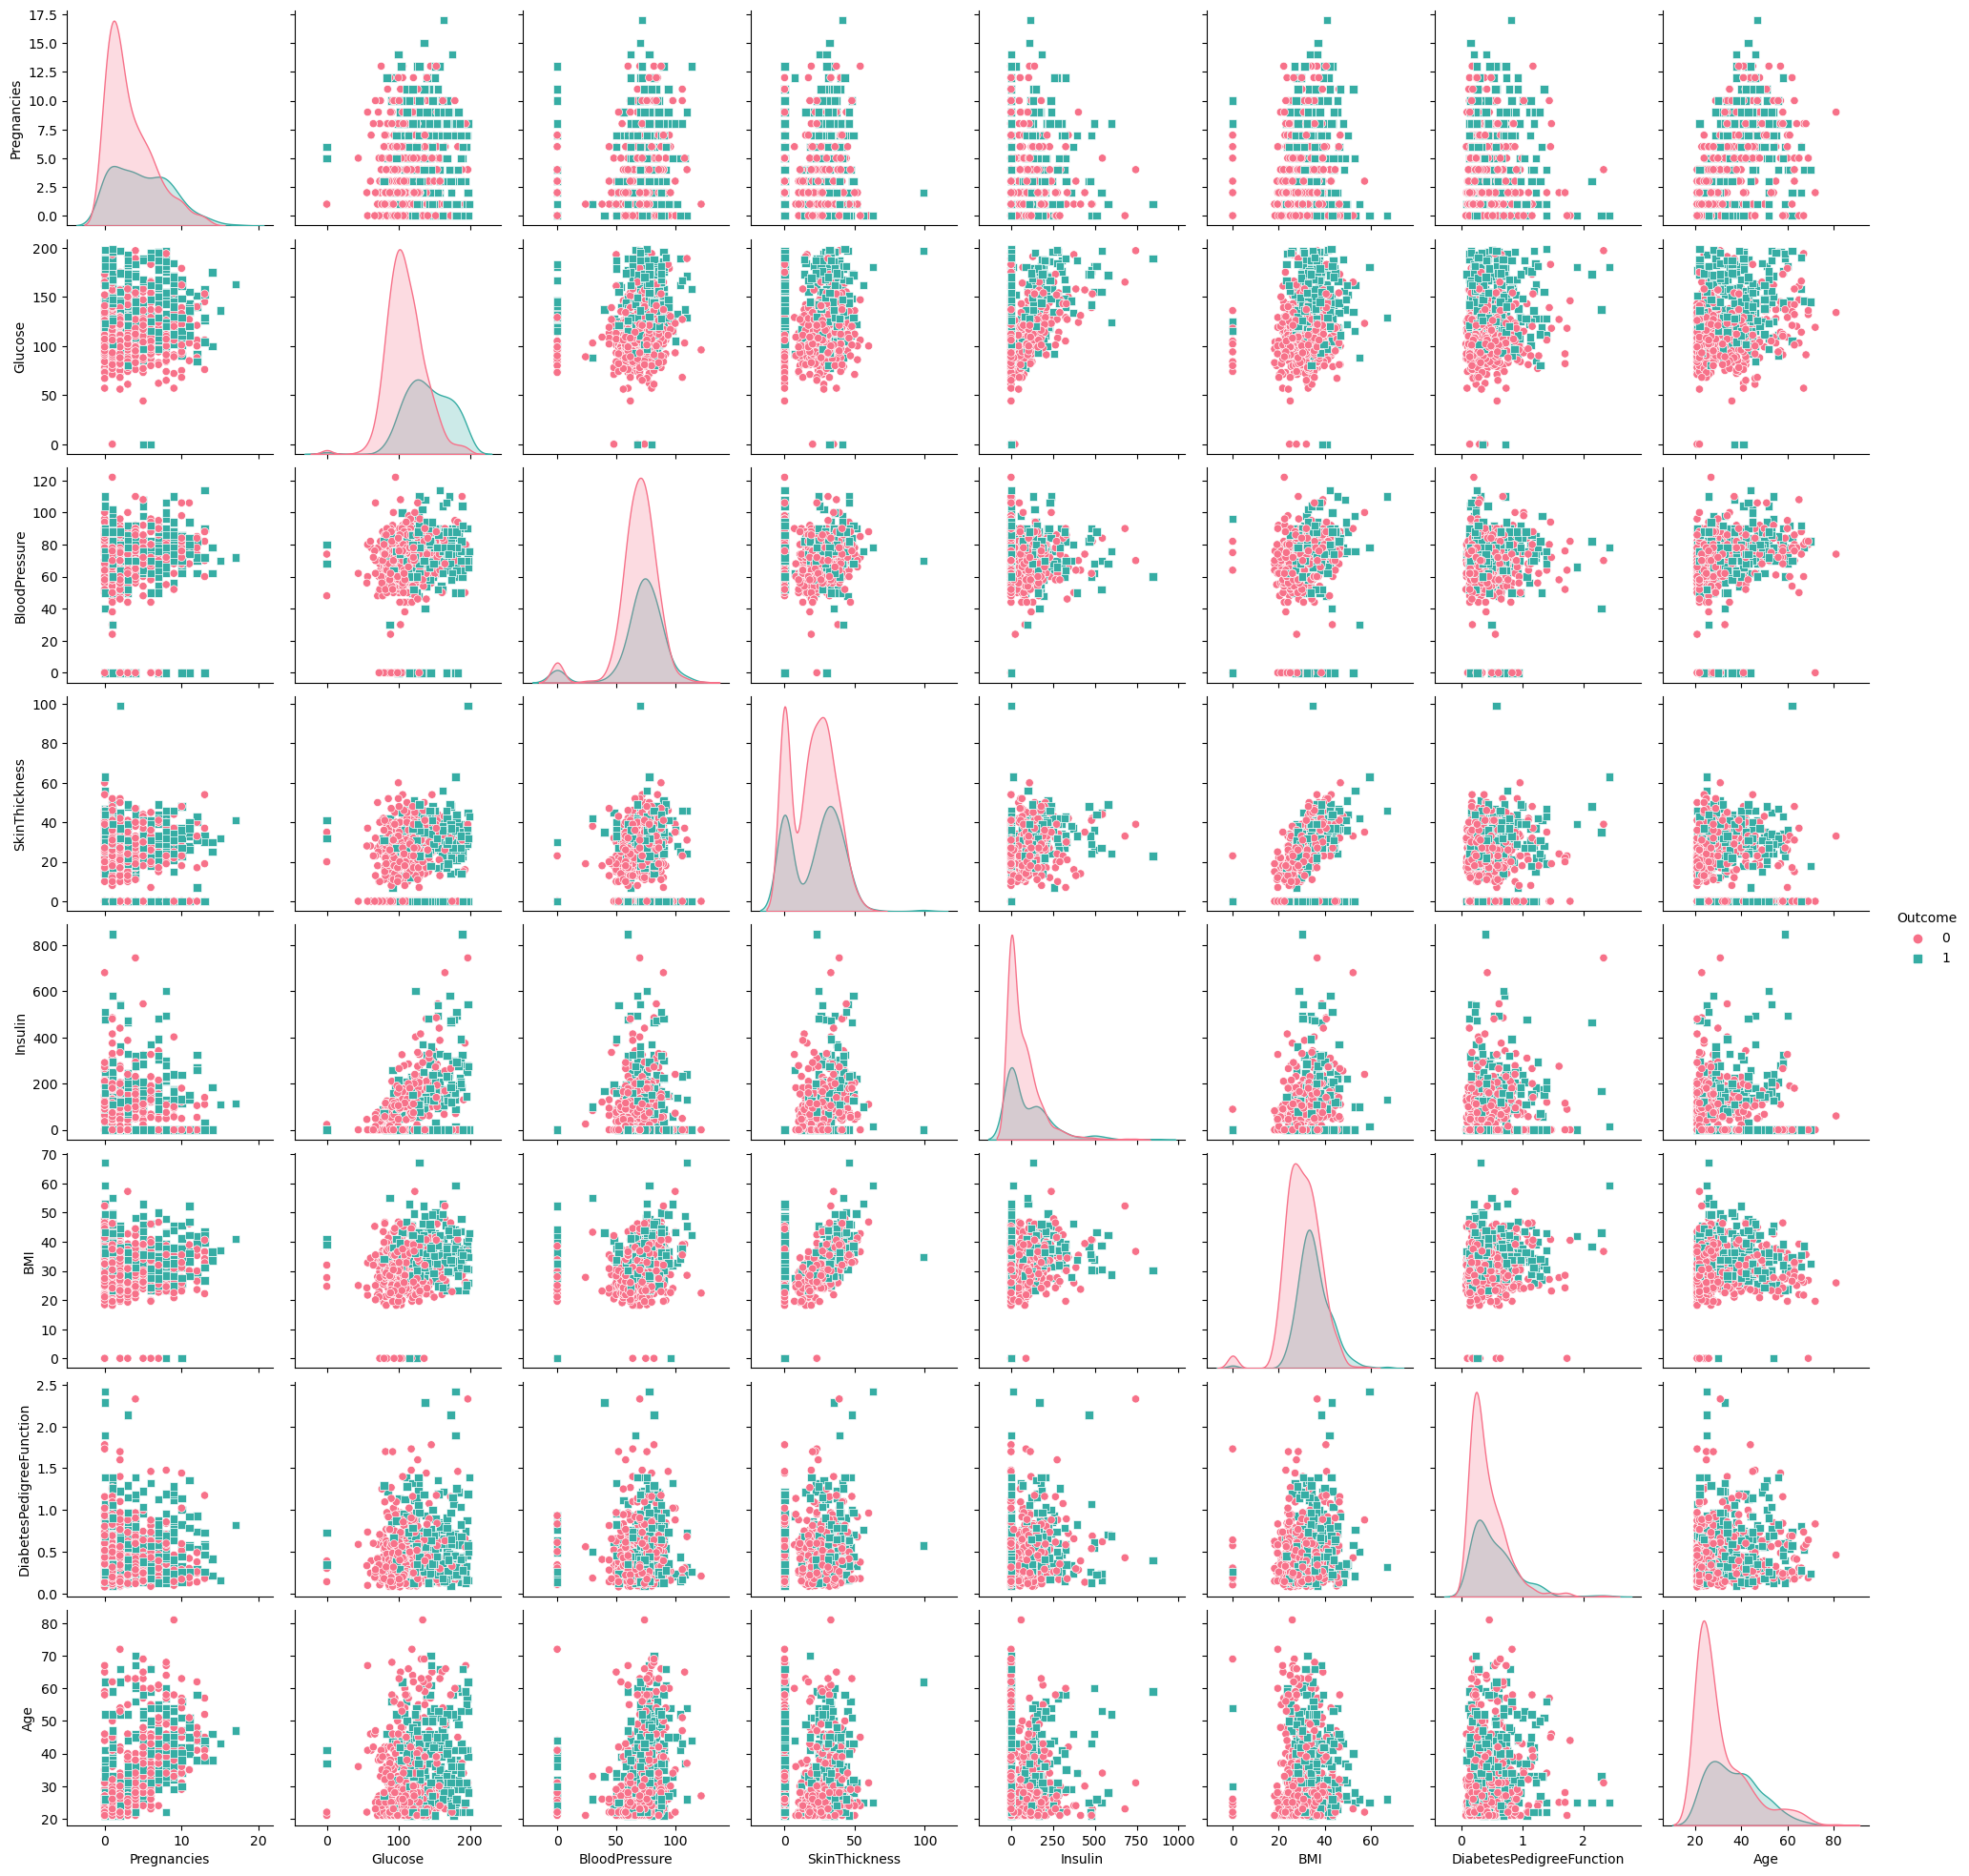

In [101]:
# Select features and target variable
x_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y_var = 'Outcome'

# Create a pairplot with SVM decision boundaries
sns.pairplot(df, x_vars=x_vars, y_vars=x_vars, hue=y_var, kind='scatter', height=2.5, markers=['o', 's'], palette='husl')

# Display the plot
plt.show()